# WEEK 5

## Cohort and Segment Analysis

In [ ]:
# Loading Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Updated_Indian_Kids_ScreenTime.csv')
sns.set_style('whitegrid')
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Band,Health_Category,Device_Category,Screen_Size,Concern_Level
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Teenagers,Physical Impact,Portable,"<30""",Attention Needed
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,Pre-teen,Physical Impact,Portable,"<30""",Attention Needed
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,Late-teens,Physical Impact,Wall-mounted,">=30""",Attention Needed
3,15,Female,1.21,Laptop,False,0.39,No Health Impact,Urban,Teenagers,No Health Impact,Portable,"<30""",No Harm
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,Pre-teen,"Physical, Mental Impact",Portable,"<30""",Attention Needed


In [ ]:
# Displaying the top 10 cohorts

# Perform cohort analysis by grouping and aggregating data
cohort_analysis = df.groupby(['Age_Band', 'Primary_Device']).agg(avg_screen_time=('Avg_Daily_Screen_Time_hr', 'mean'),
                                                                 count_users=('Avg_Daily_Screen_Time_hr', 'count')).reset_index()
Top_cohorts = cohort_analysis.sort_values(by='avg_screen_time', ascending=False).head(10)
Top_cohorts

,Age_Band,Primary_Device,avg_screen_time,count_users
10,Teenagers,TV,4.586816,735
3,Late-teens,Tablet,4.555843,166
0,Late-teens,Laptop,4.549853,341
1,Late-teens,Smartphone,4.540847,886
9,Teenagers,Smartphone,4.508386,1760
2,Late-teens,TV,4.477568,366
11,Teenagers,Tablet,4.461235,340
4,Pre-teen,Laptop,4.449055,381
8,Teenagers,Laptop,4.420928,711
5,Pre-teen,Smartphone,4.209501,1922


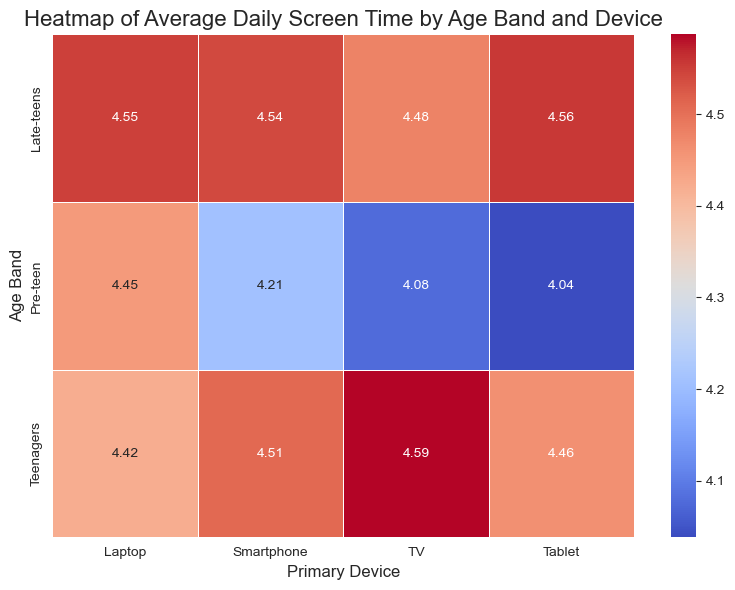

In [ ]:
#  Creating the heatmap for Top 10 cohorts

cohort_data = df.groupby(['Age_Band', 'Primary_Device'])['Avg_Daily_Screen_Time_hr'].mean().reset_index()
heatmap_pivot = cohort_data.pivot(index='Age_Band', columns='Primary_Device', values='Avg_Daily_Screen_Time_hr')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_pivot, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)    
plt.title('Heatmap of Average Daily Screen Time by Age Band and Device', fontsize=16)
plt.xlabel('Primary Device', fontsize=12)
plt.ylabel('Age Band', fontsize=12)
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

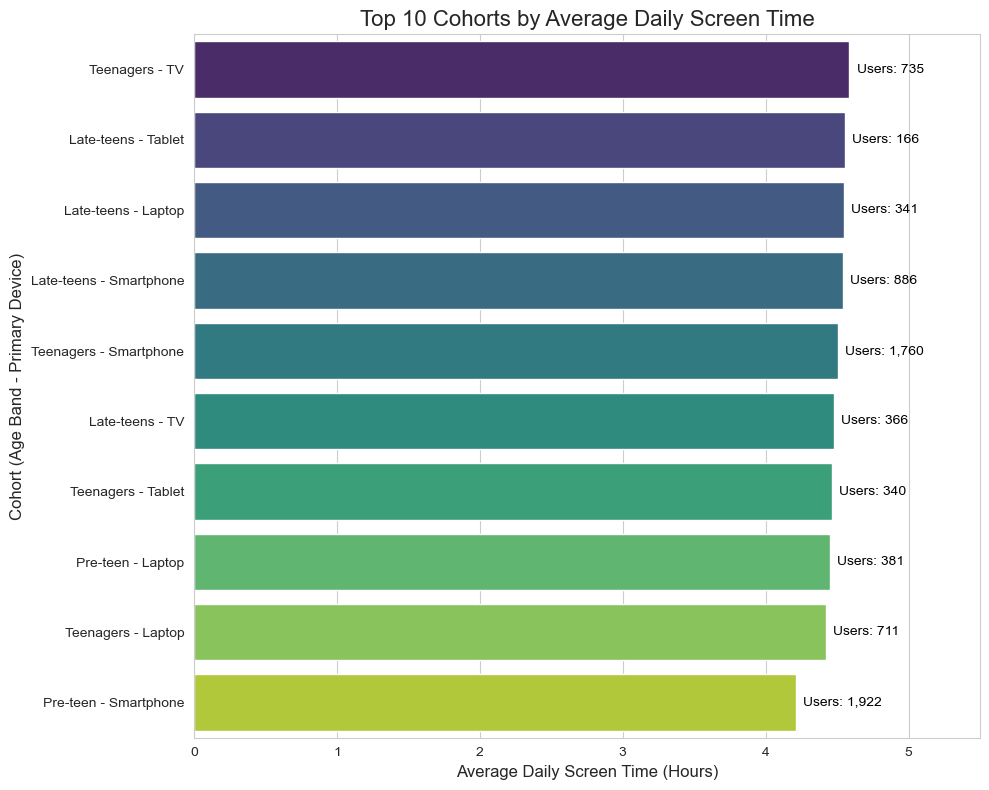

In [ ]:
# Horizontal bar chart for Top 10 Cohorts by Average Daily Screen Time

cohort_analysis = df.groupby(['Age_Band', 'Primary_Device']).agg(
    avg_screen_time=('Avg_Daily_Screen_Time_hr', 'mean'),
    count_users=('Avg_Daily_Screen_Time_hr', 'count')
).reset_index()

cohort_analysis['cohort'] = cohort_analysis['Age_Band'] + ' - ' + cohort_analysis['Primary_Device']

top_10_cohorts = cohort_analysis.sort_values(by='avg_screen_time', ascending=False).head(10)   # Top 10 cohorts

plt.figure(figsize=(10, 8))
bar_plot = sns.barplot(x='avg_screen_time', y='cohort', data=top_10_cohorts, hue='cohort', palette='viridis', orient='h', legend=False)

for index, row in top_10_cohorts.iterrows():
    bar_plot.text(row.avg_screen_time + 0.05, top_10_cohorts.index.get_loc(index), f'Users: {row.count_users:,}', color='black', ha="left", va="center")

plt.title('Top 10 Cohorts by Average Daily Screen Time', fontsize=16)
plt.xlabel('Average Daily Screen Time (Hours)', fontsize=12)
plt.ylabel('Cohort (Age Band - Primary Device)', fontsize=12)
plt.xlim(0, 5.5) 
plt.tight_layout()
plt.show()


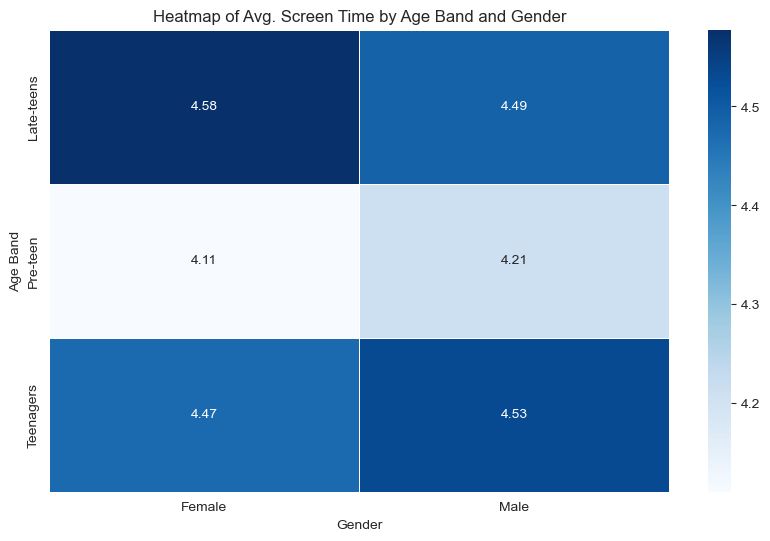

In [ ]:
# Heatmap of Screen Time by Age Band and Gender

heatmap_age_gender = df.groupby(['Age_Band', 'Gender'])['Avg_Daily_Screen_Time_hr'].mean().unstack()  #  pivot table for Age Band vs. Gender

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_age_gender, annot=True, fmt=".2f", cmap="Blues", linewidths=.5)

plt.title('Heatmap of Avg. Screen Time by Age Band and Gender')
plt.xlabel('Gender')
plt.ylabel('Age Band')
plt.show()

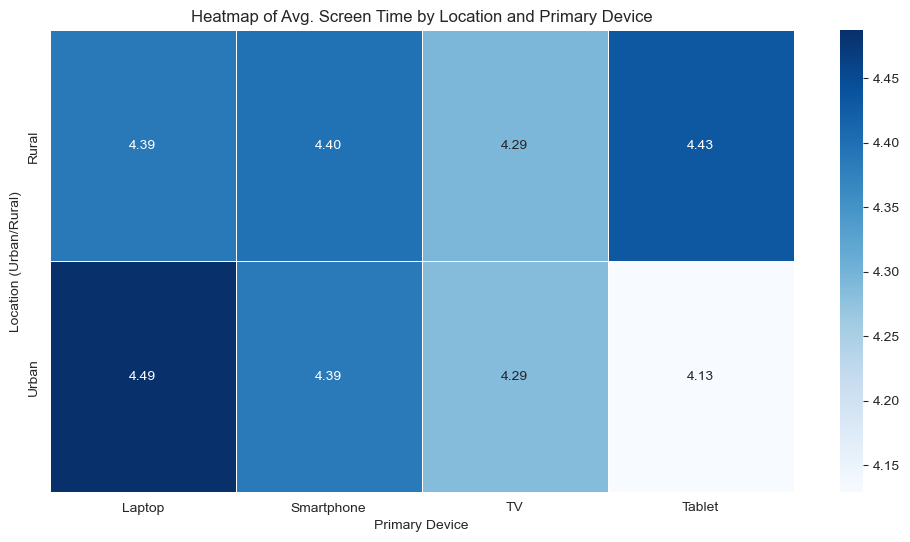

In [ ]:
# Heatmap for Screen Time by Location and Primary Device

heatmap_location_device = df.groupby(['Urban_or_Rural', 'Primary_Device'])['Avg_Daily_Screen_Time_hr'].mean().unstack()  #pivot table for Location vs. Primary Device

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_location_device, annot=True, fmt=".2f", cmap="Blues", linewidths=.5)

plt.title('Heatmap of Avg. Screen Time by Location and Primary Device')
plt.xlabel('Primary Device')
plt.ylabel('Location (Urban/Rural)')
plt.show()

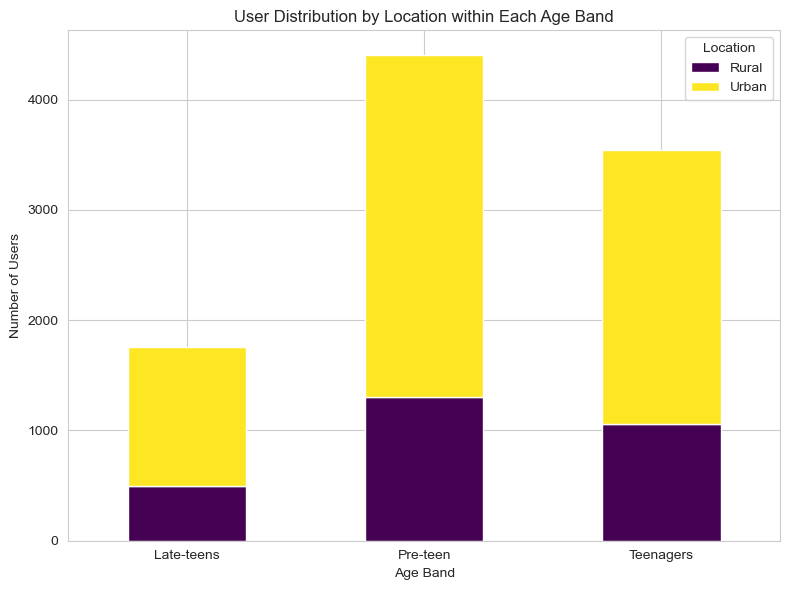

In [ ]:
# Stacked Bar Chart for User Distribution by Age and Location

# Group data by Age Band and Location to get user counts
age_location_distribution = df.groupby(['Age_Band', 'Urban_or_Rural']).size().unstack()

age_location_distribution.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')

plt.title('User Distribution by Location within Each Age Band')
plt.xlabel('Age Band')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.legend(title='Location')
plt.tight_layout()
plt.show()

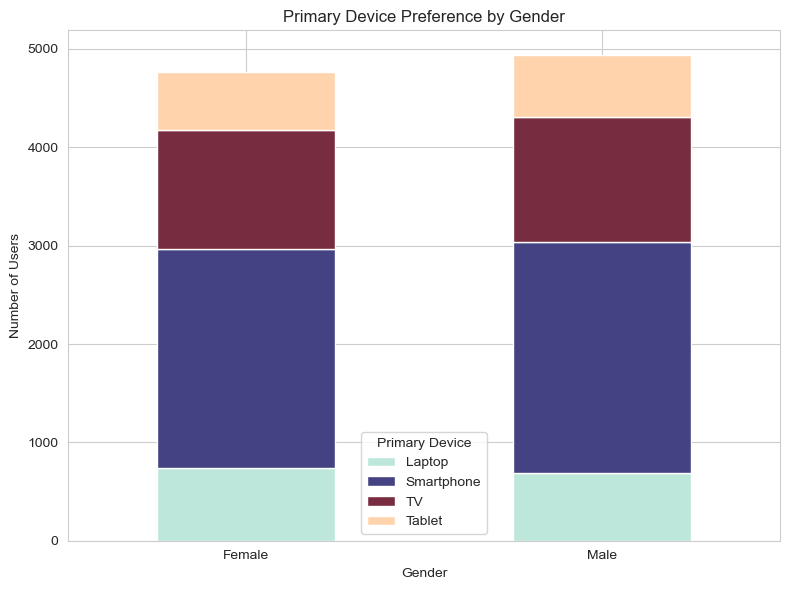

In [ ]:
# Stacked Bar Chart for Device Preference by Gender

# Group data by Gender and Device to get user counts
gender_device_distribution = df.groupby(['Gender', 'Primary_Device']).size().unstack()

gender_device_distribution.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='icefire')

plt.title('Primary Device Preference by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.legend(title='Primary Device')
plt.tight_layout()
plt.show()

## OBSERVATIONS/INSIGHTS

1.Urban vs. Rural is the Biggest Divide: The most significant factor impacting screen time is location. Urban children have drastically higher screen     time than their rural counterparts across every device. The dataset is also predominantly composed of urban users, meaning the overall high screen      time averages are largely driven by this group.

2.Males Have Higher Screen Time, Especially as They Age: Males consistently register higher average screen time than females. This gender gap becomes     more pronounced with age, peaking in the "Late-teens" category.

3.Smartphones are King, but Preferences Vary: The smartphone is the most popular primary device for both genders. However, secondary preferences          diverge: females are more likely to use a TV as their primary device, whereas males show a slightly higher preference for laptops.

4.The High-Usage User Profile: Combining these insights, the user with the highest engagement is typically an urban male in his late teens. This cohort   consistently demonstrates the highest screen time, regardless of the device they use.